<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model 1</a></span></li></ul></div>

# Load

In [1]:
import pickle

import matplotlib.pyplot as plt

import pandas as pd

from itertools import product

import numpy as np


In [4]:
filename="results/stats_model_v1"

In [5]:
infile = open(filename,'rb')
stats = pickle.load(infile)
infile.close()

# Model 1

- Timer for S/G2
- Sizer for G1/S

Keys of the dict are the parameters of the model, ordered in the following fashion: $(\alpha, \beta_0, \varepsilon, \gamma, transition\_th = M_{G1/S})$. 

For this first run, we have saved: 
- average RB amount and RB concentration over a given cycle
- delta of RB amount of RB concentration over a given cycle

The dimensionless parameters that we can look at are: 
- $ \Pi_1 = \frac{\alpha M_{G1/S} }{\beta_0 + \gamma}$
- $\Pi_2 = \beta/\gamma$

In [7]:
def Pi1(key): 
    alpha, beta0, epsilon, gamma, M_G1S = key
    return alpha*M_G1S/(beta0 + gamma)

In [8]:
def Pi2(key):
    alpha, beta0, epsilon, gamma, M_G1S = key
    return beta0/gamma

In [17]:
def Pi3(key):
    alpha, beta0, epsilon, gamma, M_G1S = key
    return alpha*M_G1S/(gamma)

In [21]:
def Pi4(key):
    alpha, beta0, epsilon, gamma, M_G1S = key
    return alpha/(beta0+gamma)

---

In [22]:
keys = list(stats.keys())

In [24]:
pi1 = np.array([Pi1(key) for key in keys])
pi2 = np.array([Pi2(key) for key in keys])
pi3 = np.array([Pi3(key) for key in keys])
pi4 = np.array([Pi4(key) for key in keys])

In [11]:
pairs = list(zip(pi1, pi2))

In [12]:
unique_pairs = []
for p in pairs:
    if p not in unique_pairs:
        unique_pairs.append(p)

In [13]:
len(unique_pairs)/len(pairs)

0.1983076923076923

About 20 % are actually unique. 

---

Let us first scatter plot all of these metrics: 

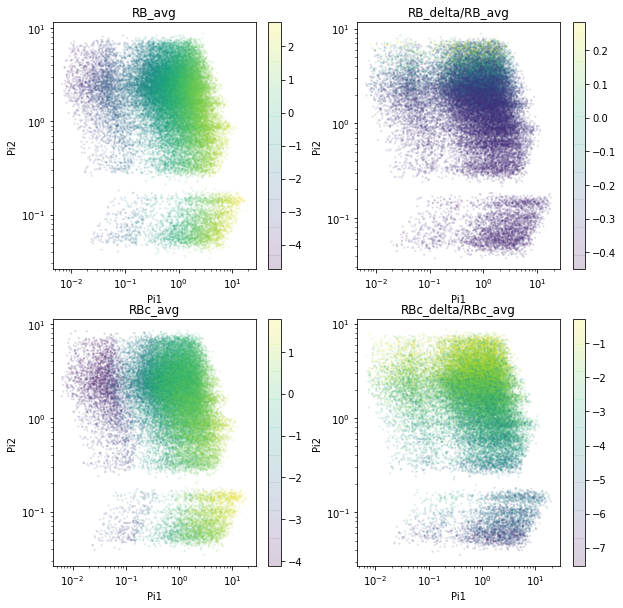

In [27]:
plot_results(pi1, pi2, stats)

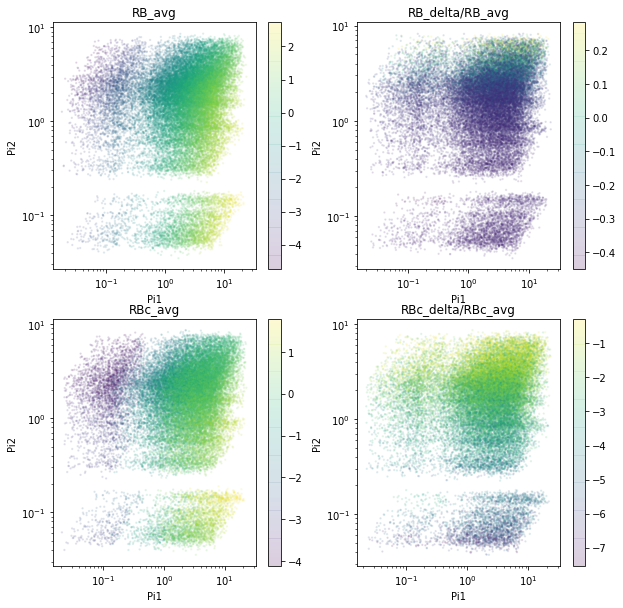

In [28]:
plot_results(pi3, pi2, stats)

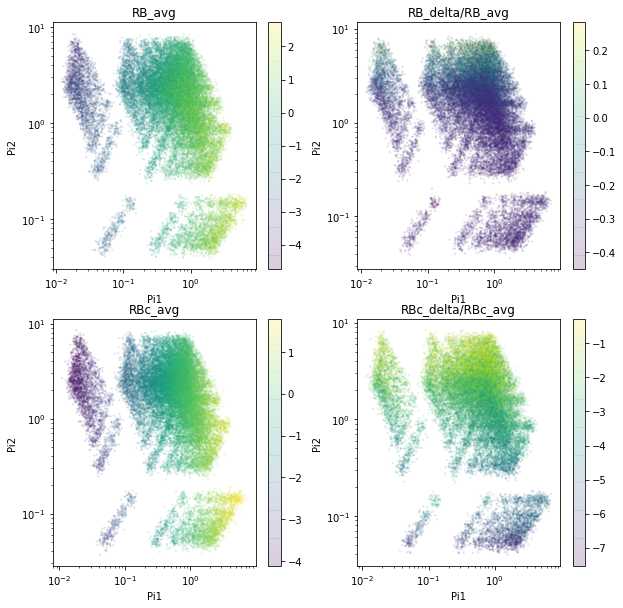

In [29]:
plot_results(pi4, pi2, stats)

In [26]:
def plot_results(pi1, pi2, stats, shift=.1, min_length=5):

    fig, ax = plt.subplots(2, 2, figsize = (10, 10))
    
    keys = list(stats.keys())
    keys_stats = list(stats[keys[0]].keys())
    for i, j in product(range(2), repeat=2):
        k = i + 2*j

        colors = []
        for m in keys:
            crt_ = stats[m][keys_stats[k]]

            if len(crt_)<=min_length:
                colors.append(np.nan)

            else:
                if keys_stats[k].endswith("delta"):
                    val = crt_[-1]/stats[m][keys_stats[k].split("delta")[0]+"avg"][-1]
                    title = keys_stats[k] + "/" + keys_stats[k].split("delta")[0]+"avg"
                else:
                    val = crt_[-1]
                    title = keys_stats[k]
                colors.append(val)

        valid = ~np.isnan(np.array(colors))
        p = ax[i,j].scatter(
            pi1[valid]*(1+shift*np.random.randn(len(valid[valid]))), 
            pi2[valid]*(1+shift*np.random.randn(len(valid[valid]))), 
            s=2,
            c=np.log(np.array(colors)[valid]), alpha=.1
        )
        ax[i,j].set_title(title)
        ax[i,j].set_xscale('log')
        ax[i,j].set_yscale('log')
        ax[i,j].set_xlabel("Pi1")
        ax[i,j].set_ylabel("Pi2")
        fig.colorbar(p, ax=ax[i,j])